In [1]:
import numpy as np

In [85]:
x = np.array([[10.  ,       10.        ],
 [41.36407371 ,54.42759544],
 [54.05891366 ,51.51272472],
 [90.     ,    10.        ]])

In [208]:
class PathInterpolator:
    def __init__(self, path):
        self.path = path
        self.path_cnt = path.shape[0]
        diff_lengths = np.zeros(self.path_cnt)
        for i in range(self.path_cnt-1):
            diff_lengths[i+1] = self.distance(self.path[i,:], self.path[i+1,:])
        self.diff_lengths = diff_lengths
        self.length = np.sum(diff_lengths)
        self.cumlen = np.cumsum(diff_lengths)

    def linear_samples(self, n):
        return self.length * np.linspace(0, 1.0, n)

    def approx_step_samples(self, step):
        nsteps = np.ceil(self.length / step)
        nsteps = int(max(nsteps, 2))
        return np.linspace(0.0, self.length, nsteps)

    def distance(self, q0, q1):
        return np.linalg.norm(q1 - q0)
    
    def interpBetween(self, q0, q1, s):
        return q0 + s * (q1 - q0)
    
    def interp(self, ss):
        xs = np.searchsorted(self.cumlen, ss, side='right')
        xs = np.minimum(np.maximum(xs - 1, 0), self.path_cnt-2)
        delta = ss - self.cumlen[xs]
        gaps = self.diff_lengths[xs + 1]
        ss = delta / gaps
        res = []
        for i in range(len(ss)):
            q0 = self.path[xs[i]]
            q1 = self.path[xs[i]+1]
            s = ss[i]
            q = self.interpBetween(q0, q1, s)
            res.append(q)
        return np.vstack(res)

In [205]:
i = Interpolator(x)
ss = i.linear_samples(20)
pts = i.interp(ss)

In [206]:
import matplotlib.pyplot as plt

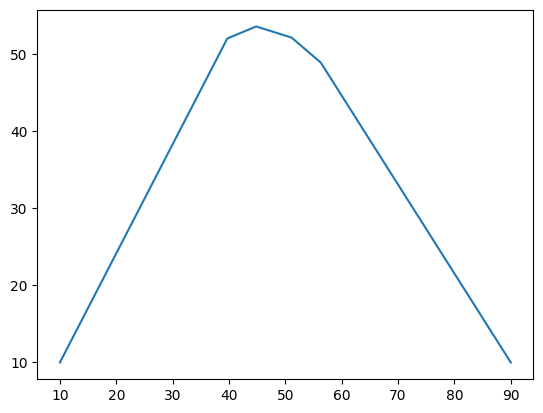

In [207]:
plt.plot(pts[:,0], pts[:,1])